In [ ]:
from google.colab import files
uploaded = files.upload()

Saving twitter_validation.csv to twitter_validation.csv


In [ ]:
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy import displacy
from collections import Counter
import gensim
from gensim import corpora
from gensim.models import LdaModel
import plotly.express as px

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load the datasets
training_data = pd.read_csv('twitter_training.csv')
validation_data = pd.read_csv('twitter_validation.csv')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Function to perform sentiment analysis using NLTK Vader
def perform_sentiment_analysis(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores['compound']

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function for topic modeling using LDA (Latent Dirichlet Allocation)
def perform_topic_modeling(texts):
    # Tokenize words and filter out stopwords
    texts = [[token for token in nltk.word_tokenize(doc.lower()) if token.isalnum()] for doc in texts]

    # Create dictionary and corpus for LDA
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Build LDA model
    lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

    # Print topics and top words for each topic
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic {idx}: {topic}")

    return lda_model



In [ ]:
import pandas as pd


# Inspect the data
print(training_data.head())
print(validation_data.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  \
0  I am coming to the borders and I will kill you...      
1  im getting on borderlands and i will kill you ...      
2  im coming on borderlands and i will murder you...      
3  im getting on borderlands 2 and i will murder ...      
4  im getting into borderlands and i can murder y...      

                                        cleaned_text predicted_sentiment  
0  i am coming to the borders and i will kill you...             Neutral  
1  im getting on borderlands and i will kill you all             Neutral  
2  im coming on borderlands and i will murder you...             Neutral  
3  im getting on borderlands 2 and i will murder ...             Neutral  
4  im getting into borderlands and i can murder y...             

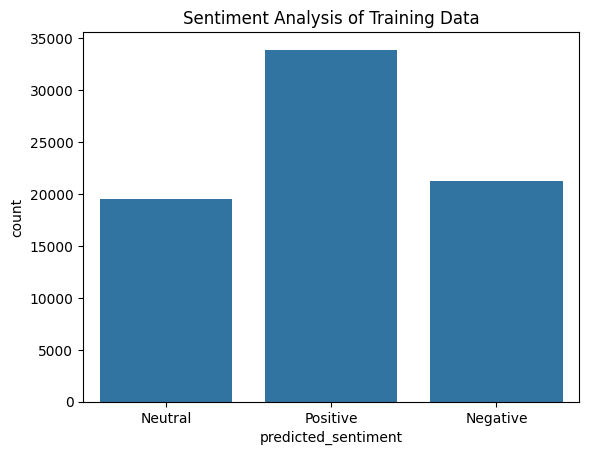

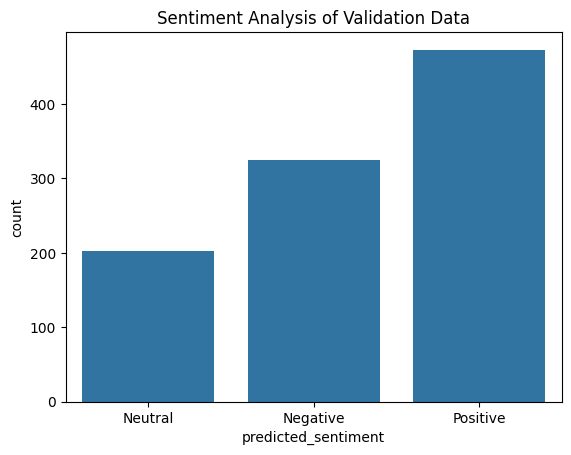

In [ ]:
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to clean text and handle non-string entries
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = text.lower()
    return text

# Function to get sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the cleaning function to the text data
training_data['cleaned_text'] = training_data.iloc[:, 3].apply(clean_text)
validation_data['cleaned_text'] = validation_data.iloc[:, 3].apply(clean_text)

# Apply the sentiment function to the cleaned text data
training_data['predicted_sentiment'] = training_data['cleaned_text'].apply(get_sentiment)
validation_data['predicted_sentiment'] = validation_data['cleaned_text'].apply(get_sentiment)

# Inspect the data with sentiment
print(training_data.head())
print(validation_data.head())

# Function to plot sentiment distribution
def plot_sentiment_distribution(data, title):
    sns.countplot(x='predicted_sentiment', data=data)
    plt.title(title)
    plt.show()

# Plot sentiment distribution for training and validation data
plot_sentiment_distribution(training_data, 'Sentiment Analysis of Training Data')
plot_sentiment_distribution(validation_data, 'Sentiment Analysis of Validation Data')




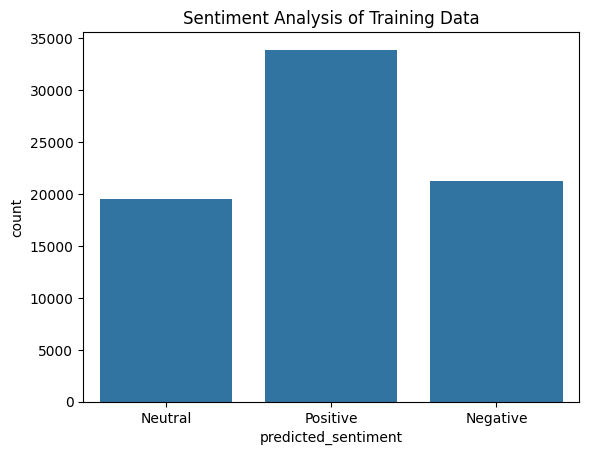

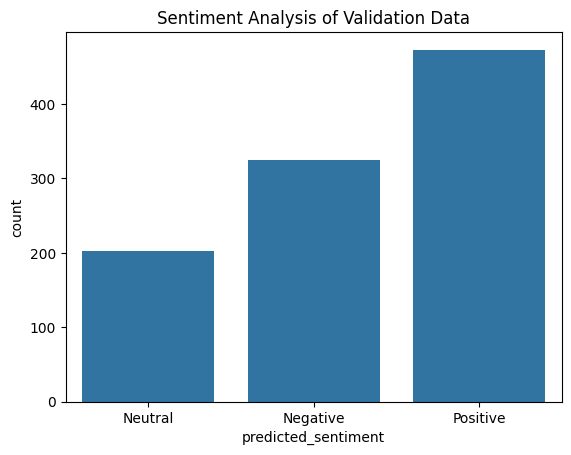

In [ ]:
# Function to plot sentiment distribution
def plot_sentiment_distribution(data, title):
    sns.countplot(x='predicted_sentiment', data=data)
    plt.title(title)
    plt.show()

# Plot sentiment distribution for training and validation data
plot_sentiment_distribution(training_data, 'Sentiment Analysis of Training Data')
plot_sentiment_distribution(validation_data, 'Sentiment Analysis of Validation Data')
